In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from keras.datasets import mnist
#mnist.load_data() comes as two tuples with train and test data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
#size of the data and shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#look at one image as pixel values to understand the data
for i in range(23):
  print(x_train[0][i])

In [4]:
#10 numbers to predict
output_size = 10
#create arrays of size 10 with all zeros exept the true number represented as a 1
y_train = keras.utils.to_categorical(y_train, output_size)
y_test = keras.utils.to_categorical(y_test, output_size)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
#normalize data, turn each pixel to a value between [0,1] from [0,255]
x_train = x_train / 255
x_test = x_test / 255

Choose between CNN NN or Fully Connected NN

In [6]:
#change cnn to True for CNN and false for fully connected NN
cnn = True

fully_connected = not cnn


In [7]:

#reshape data to better fit into the NN, -1 to make the lib do the calculation, this case 784
if fully_connected:
    x_train =  x_train.reshape(x_train.shape[0],-1)
    x_test =  x_test.reshape(x_test.shape[0],-1)
    print(x_train.shape)


CNN:

In [8]:
if cnn:
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    model = Sequential()

    # Add a 2D Convolutional layer with 32 filters and a 3x3 kernel and relu activation
    #32 is arbirary but should work well with this data
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    # Add a max pooling layer with 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)             

Fully Connected Layers:

In [9]:
if fully_connected:
    model = Sequential()
    model.add(Dense(units=128, input_shape=(784,), activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

In [10]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10


118/118 [==============================] - 5s 40ms/step - loss: 0.5475 - accuracy: 0.8304
Epoch 2/10
118/118 [==============================] - 5s 40ms/step - loss: 0.1368 - accuracy: 0.9599
Epoch 3/10
118/118 [==============================] - 5s 39ms/step - loss: 0.0962 - accuracy: 0.9707
Epoch 4/10
118/118 [==============================] - 5s 40ms/step - loss: 0.0787 - accuracy: 0.9771
Epoch 5/10
118/118 [==============================] - 5s 39ms/step - loss: 0.0653 - accuracy: 0.9806
Epoch 6/10
118/118 [==============================] - 5s 39ms/step - loss: 0.0593 - accuracy: 0.9823
Epoch 7/10
118/118 [==============================] - 5s 39ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 8/10
118/118 [==============================] - 5s 40ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 9/10
118/118 [==============================] - 5s 40ms/step - loss: 0.0449 - accuracy: 0.9866
Epoch 10/10
118/118 [==============================] - 5s 39ms/step - loss: 0.0407 - accu

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("test loss: ",test_loss)
print("test acc: " , test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9920
test loss:  0.024365704506635666
test acc:  0.9919999837875366


313/313 [==============================] - 0s 1ms/step


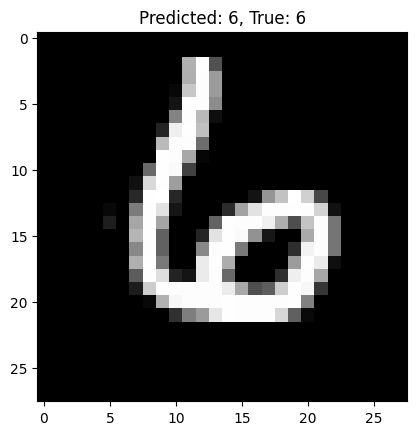

In [12]:
# Single example


random_id = np.random.choice(len(x_test))
x_sample = x_test[random_id]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_id]
y_sample_pred_class = np.argmax(model.predict(x_test), axis=1)[random_id]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=12)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

313/313 [==============================] - 0s 1ms/step


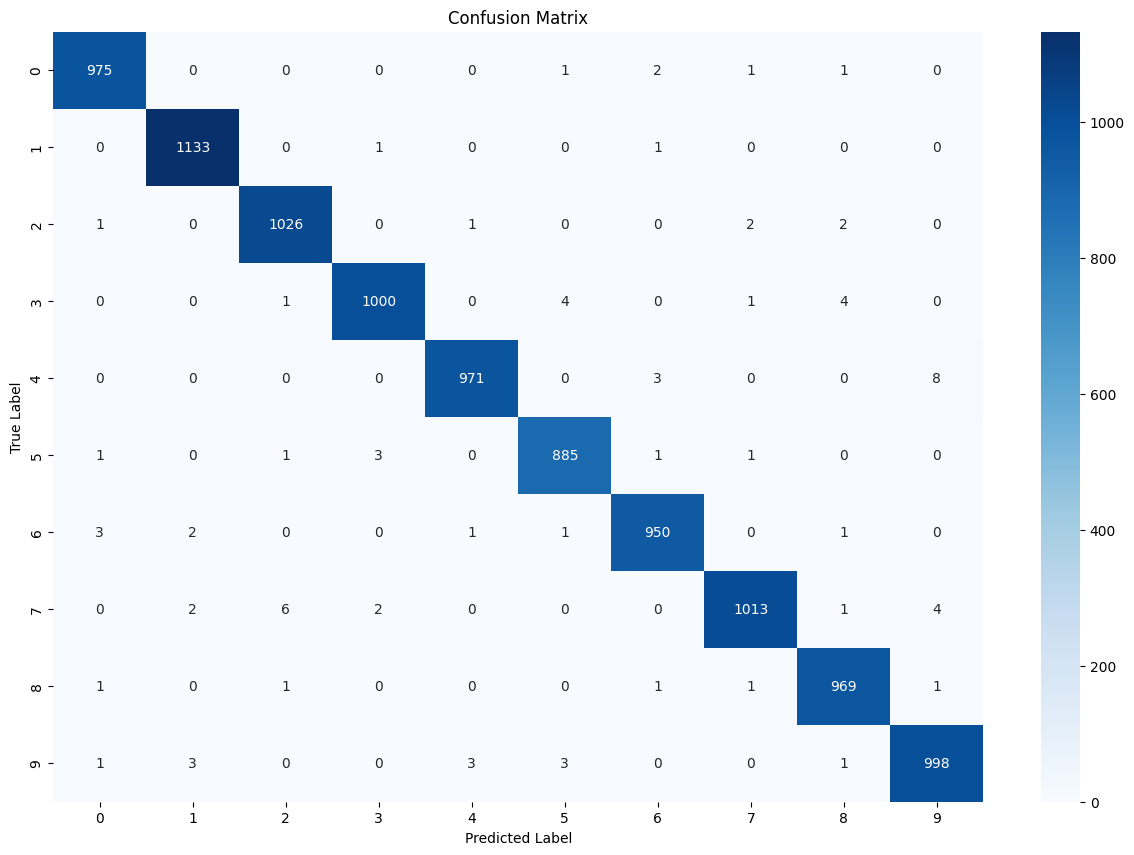

In [13]:
confusion_mtx = confusion_matrix(y_true, np.argmax(model.predict(x_test), axis=1))

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');